# Labo 1: Dirac Vs Schrödinger - Answers

First make a rectangular scattering region and attach leads to it:

# Graphene

Exercise 1:
Repeat the explorations done with a square lattice: try to answer the following questions and justify your
sentences with graphs. To answer some of the questions you may have to explore the literature on graphene
(with no need to go very deep, a good review or a seminal paper shall bring you all the informations).

1) What is the upper limit of E which gives reasonable results? We will in the following restrict our study
to energies below this threshold.

2) What happens for E < 0? How does it compare to the case of a square lattice? Which property of
graphene does it underline?

3) How would you qualify the way transmission evolves with energy in the low density limit (the average evolution, not its
discretization)? How does it compare to the square lattice? Which property of graphene does it underline?

4) Focus on the very low energy limit of the dispersion relation, where discrete steps can be observed.
Comment their spacing and compare with the square lattice. Which property of graphene does it underline?

In [51]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import numpy as np
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp
from types import SimpleNamespace
import matplotlib
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [52]:
def hopping(site_i, site_j):
    """
    Definition of the hopping parameter by including the magnetic field (parameter phi)
    
    """
    
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -t * exp(-0.5j * B_eff * (xi - xj) * (yi + yj))

In [53]:
def make_system(a=1,W=20,L=20,t=1.0):
    graphene = kwant.lattice.honeycomb(a,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        return abs(x) < L//2 and abs(y) < W//2
    def lead_shape(pos):
        x, y = pos
        return -W//2 < y < W//2
  
    sys[graphene.shape(rectangular, (0,0))] = 0
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = hopping

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape, (0, 0))] =  0
    lead0[graphene.neighbors()]= hopping
    sys.attach_lead(lead0)
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((1, 0)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape, (0, 0))] =  0
    lead1[graphene.neighbors()]= hopping
    sys.attach_lead(lead1)

    return sys

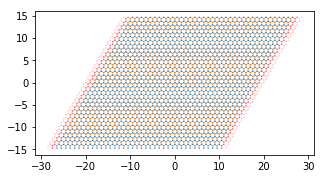

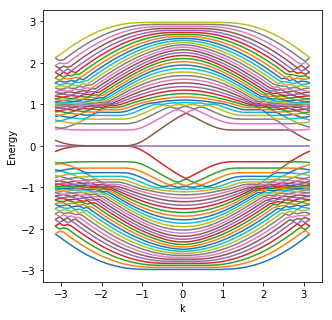

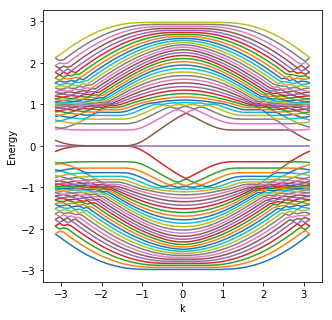

In [65]:
a = 1
W = 30
L = 20
t = 1
Ef = 10
B_eff = 0.1
sys = make_system(a,W,L,t)

kwant.plot(sys)

# Finalize the system.
graph = sys.finalized()
kwant.plotter.bands(graph.leads[0])

In [66]:
wfs = kwant.wave_function(graph, energy=Ef) # to obtain the wave functions of the system 

J0 = kwant.operator.Current(graph)
wf_left = wfs(0)
current = sum(J0(p) for p in wf_left)

kwant.plotter.current(graph, current, cmap='viridis')

TypeError: object of type 'int' has no len()

In [62]:
params = SimpleNamespace(B_eff=B_eff)#, Vg=Vg, l_pot=l_pot, w_pot=w_pot, R=R, shape=shape)

In [ ]:
""" The wavelength must be (much more) larger than the lattice parameter """
lambda_F = 2 * pi * a * sqrt(2 * t / Ef) # computation of the wavelength
if lambda_F/a < 2:
    print('Warning : lambda_F must be larger than the lattice parameter a')

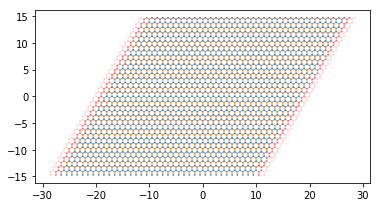

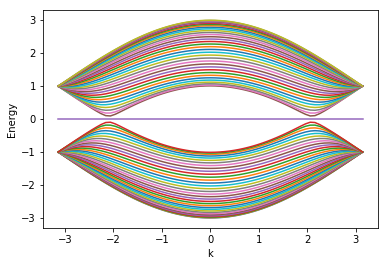

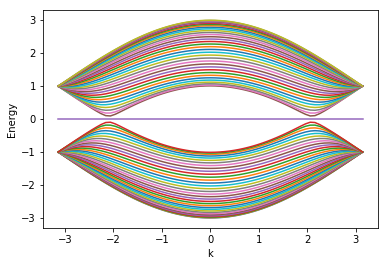

In [15]:
a = 1
W = 30
L = 20
t = 1
sys = make_system(a,W,L,t)

kwant.plot(sys)

# Finalize the system.
graph = sys.finalized()
kwant.plotter.bands(graph.leads[0])

In [9]:
N = 50
E = np.linspace(-1.5,1.5,N)
Gr = np.zeros([N,1])
for i,Ef in enumerate(E):
    smatrix = kwant.smatrix(graph, energy = Ef)
    T = smatrix.transmission(1, 0)
    Gr[i] = T

Text(0, 0.5, 'Transmission')

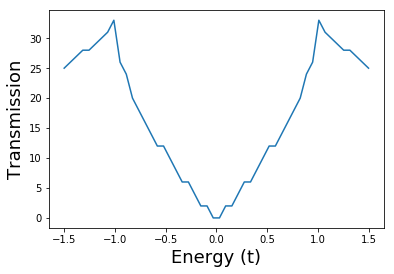

In [10]:
pyplot.plot(E,Gr)

pyplot.xlabel('Energy (t)', fontsize=18)
pyplot.ylabel('Transmission', fontsize=18)

Answers:

1) For energies above t (t=1 here), the conductance starts to decrease whereas we still increase the carrier density, which is not physical. Once again, we leave tight binding approximationfor high energies.

2) For negative energies, we the conductance is non zero and re-increases. This is due to the fact that grahene has no gap, which differs from the square lattice. Graphene is often called a gapless semiconductor or semi-metal.

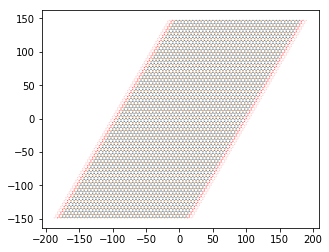

In [16]:
# Let's make a larger system.
a = 5
W = 300
L = 20
t = 1
sys = make_system(a,W,L,t)
kwant.plot(sys)
graph = sys.finalized()
N = 60
E = np.linspace(-0.5,0.5,N)
Gr = np.zeros([N,1])
for i,Ef in enumerate(E):
    smatrix = kwant.smatrix(graph, energy = Ef)
    T = smatrix.transmission(1, 0)
    Gr[i] = T

Text(0, 0.5, 'Transmission')

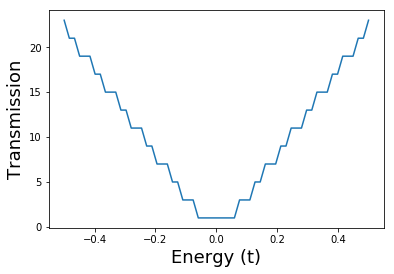

In [12]:
pyplot.plot(E,Gr)
pyplot.xlabel('Energy (t)', fontsize=18)
pyplot.ylabel('Transmission', fontsize=18)

3) The conductance evolves linearly with energy. This is a consequence of the linear dispersion relation of graphene. Graphene excitations are often called Dirac fermions because of this dispersion: this is the dispersion relation of photons rather than "electrons" in the Schrödinger sense, which have a parabolic (i.e. massive) dispersion.

In [13]:
a = 5
W = 300
L = 20
t = 1
sys = make_system(a,W,L,t)
graph = sys.finalized()
N = 60
E = np.linspace(-0.25,0.25,N)
Gr = np.zeros([N,1])
for i,Ef in enumerate(E):
    smatrix = kwant.smatrix(graph, energy = Ef)
    T = smatrix.transmission(1, 0)
    Gr[i] = T

Text(0, 0.5, 'Transmission')

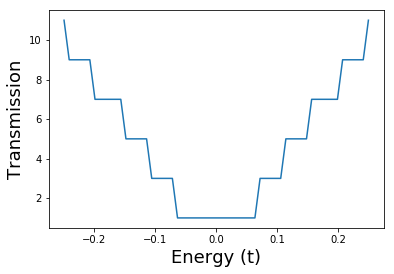

In [14]:
pyplot.plot(E,Gr)
pyplot.xlabel('Energy (t)', fontsize=18)
pyplot.ylabel('Transmission', fontsize=18)

4) By looking closely at the above graph, we can see that conductance steps evolve by steps of 2 units instead of 1 for the square lattice. This is due to the valley degeneracy of graphene. Indeed, graphene dispersion relation exhibits two inequivalent valleys around two corners of the Brillouin zone called K and K'. 

These valleys are in general degenerate in energy, and each time a mode enters the graphene ribbon, it contributes for two transmission units: one for each valley.